# **Test de imagen y vídeo**

Estas celdas pone a prueba el *core* y algunos bloques de la librería.

Funciona en la versión 0.1.19, pero más allá puede que no.

Los submódulos **core** y **blocks** aún no están *congelados*.

---

**ATENCIÓN**: La celda del vídeo es (muy) lenta si la usas en Colab. Incluso con un kernel con GPU. Usa un servidor jupyter local.



In [ ]:
!pip -q install ml4teens==0.1.19

## Vídeo al que se le ajusta el tamaño según el tamaño de una imagen exterior.

**Observar**: se ejecutan (context.run) varios bloques, primero 'imagen' (que establece el shape que ha de tener el vídeo) y luego 'vídeo'.

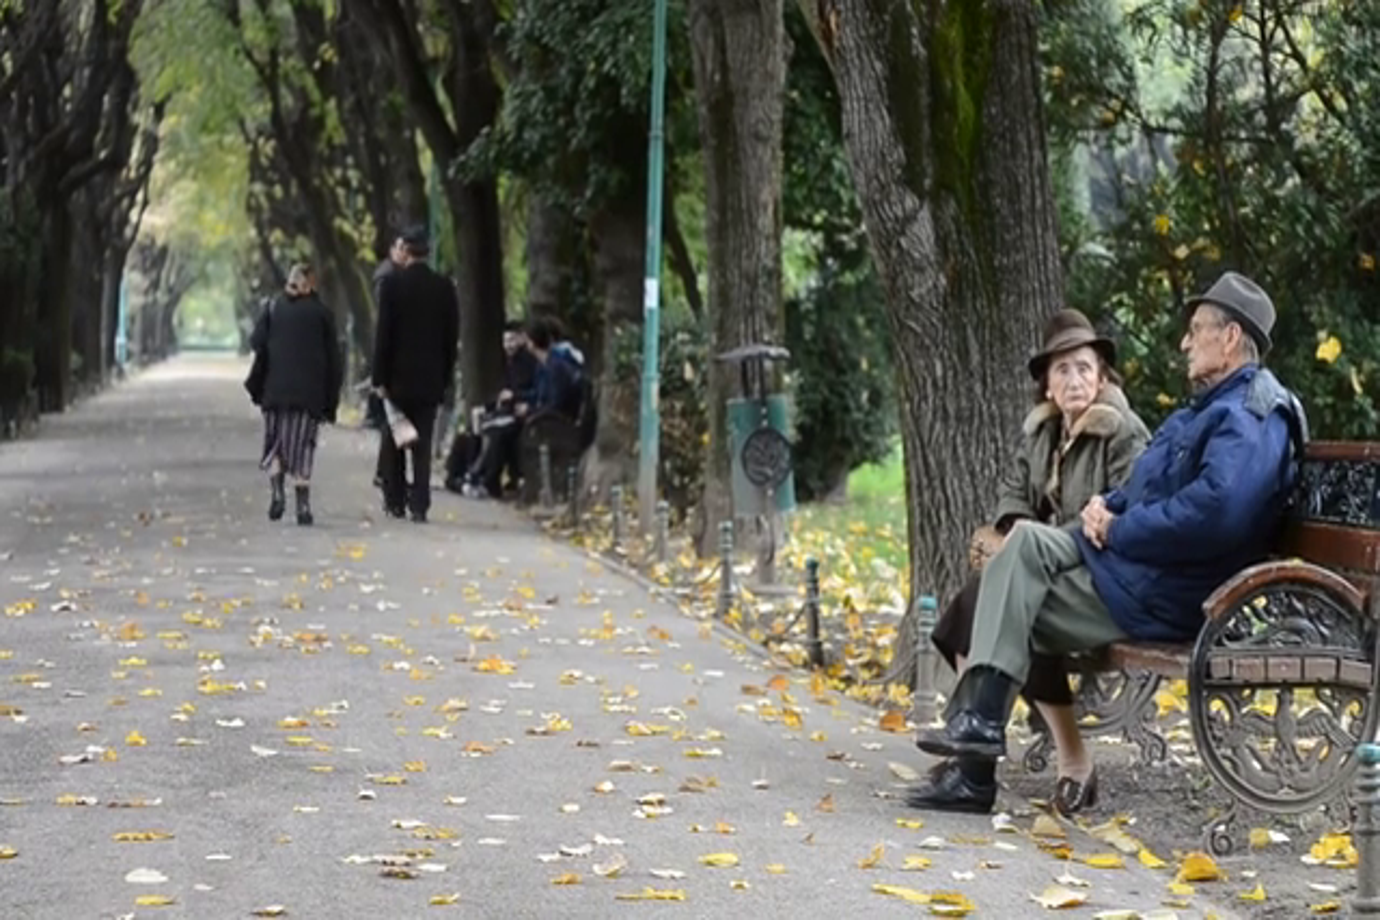

In [3]:
import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.ImageSource(source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307");
vídeo    = ml.blocks.VideoSource(source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b");
resize   = ml.blocks.ResizeImage(height=200);
salida   = ml.blocks.Display();

imagen["image"] >> resize["shape"];
vídeo["frame"]  >> resize["image"];
resize["image"] >> salida["image"];

try:
  context.run(imagen,vídeo);

except Exception as e:
  print(e, flush=True)
  traceback.print_exc(file=sys.stdout);


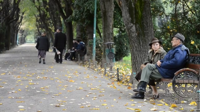

In [2]:
import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.VideoSource(source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b");
resize   = ml.blocks.ResizeImage(width=200);
salida   = ml.blocks.Display();

vídeo["frame"]  >> resize["image"];
resize["image"] >> salida["image"];

try:
  vídeo.run();
except Exception as e:
  print(e, flush=True)
  traceback.print_exc(file=sys.stdout);


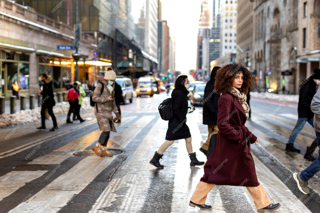

In [4]:
import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.ImageSource(source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307");
split    = ml.blocks.SplitChannels();
merge    = ml.blocks.MergeChannels();
salida   = ml.blocks.Display(width=320, feed=True);

imagen["image"] >> split["image"];

split["red"]   >> merge["red"];
split["green"] >> merge["green"];
split["blue"]  >> merge["blue"];

merge["image"] >> salida["image"];

try:
  imagen.run();
except Exception as e:
  print(e, flush=True)
  traceback.print_exc(file=sys.stdout);


/home/fran/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


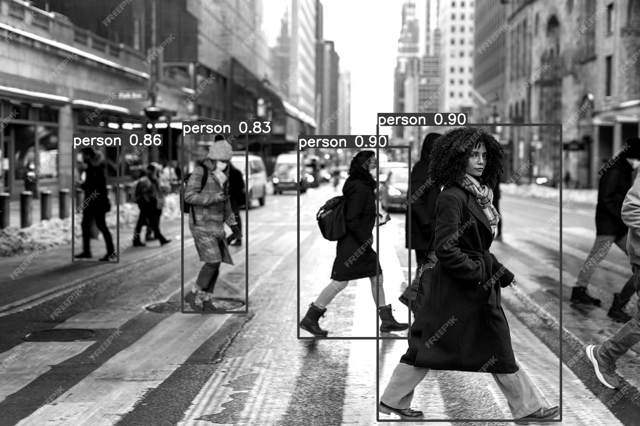

In [5]:
import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.ImageSource(source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307");
objid    = ml.blocks.ObjectID(model_name="xs", conf=0.80);
grey     = ml.blocks.SingleChannel(channel=2);
salida   = ml.blocks.Display(width=640);
terminal = ml.blocks.Terminal();

((imagen["image"] >> objid["image"])["image"] >> grey["image"])["image"]>> salida["image"];

objid["boxes"] >> terminal["stdout"];

try:
  imagen.run();
except Exception as e:
  print(e, flush=True)
  traceback.print_exc(file=sys.stdout);



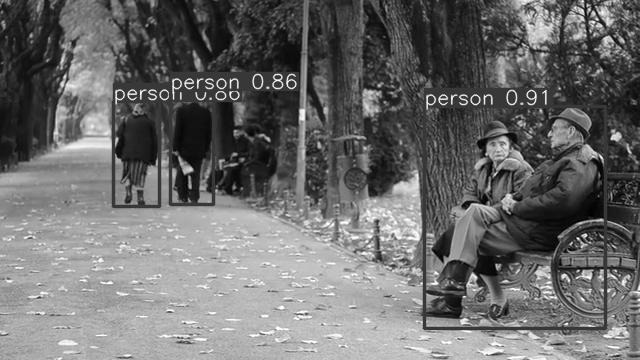

In [6]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.VideoSource(source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b");
grey     = ml.blocks.SingleChannel(channel=1);
objid    = ml.blocks.ObjectID(model_name="xs", conf=0.60);
salida   = ml.blocks.Display(width=640);

((vídeo["frame"] >> objid["image"])["image"] >> grey["image"])["image"] >> salida["image"];

try:
  vídeo.run();
except Exception as e:
  print(e)


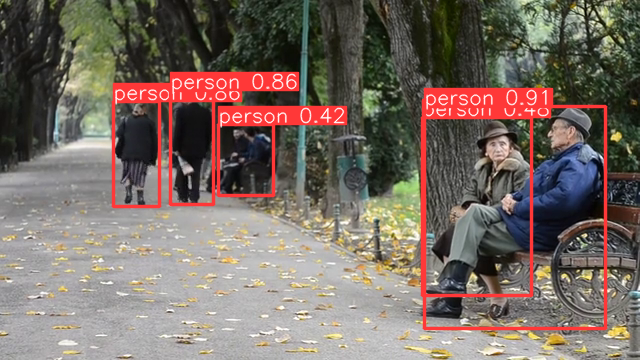

In [7]:
import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.VideoSource(source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b");
objid    = ml.blocks.ObjectID(model_name="xs");
salida   = ml.blocks.Display(width=640);

vídeo["frame"] >> objid["image"];
objid["image"] >> salida["image"];


try:
  vídeo.run();
except Exception as e:
  print(e, flush=True)
  traceback.print_exc(file=sys.stdout);
